###  Objective
The main objective here is to score clients so we know who to email . We will evaluate our models using ROC curve and AUC.

In [29]:
from fastai.imports import *
os. listdir('../input/')

['caravan-insurance-challenge.csv']

In [30]:
df = pd.read_csv('../input/caravan-insurance-challenge.csv')
original = df.copy()
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


adding the real labels :
(sorry for the messy cell will be the only one i promise :p )

In [31]:
labels = ['ORIGIN', 'CustomerSubtype', 'NumberOfHouses1', 'AvgSizeHousehold1', 'AvgAge', 'CustomerMainType', 'RomanCatholic', 'Protestant...', 'OtherReligion', 'NoReligion', 'Married', 'LivingTogether', 'OtherRelation', 'Singles', 'HouseholdWithoutChildren', 'HouseholdWithChildren', 'HighLevelEducation', 'MediumLevelEducation', 'LowerLevelEducation', 'HighStatus', 'Entrepreneur', 'Farmer', 'MiddleManagement', 'SkilledLabourers', 'UnskilledLabourers', 'SocialClassA', 'SocialClassB1', 'SocialClassB2', 'SocialClassC', 'SocialClassD', 'RentedHouse', 'HomeOwners', '1Car', '2Cars', 'NoCar', 'NationalHealthService', 'PrivateHealthInsurance', 'Income<30.000', 'Income30-45.000', 'Income45-75.000', 'Income75-122.000', 'Income>123.000', 'AverageIncome', 'PurchasingPowerClass', 'ContributionPrivateThirdPartyInsurance', 'ContributionThirdPartyInsurance(firms)...', 'ContributionThirdPartyInsurane(agriculture)', 'ContributionCarPolicies', 'ContributionDeliveryVanPolicies', 'ContributionMotorcycle/scooterPolicies', 'ContributionLorryPolicies', 'ContributionTrailerPolicies', 'ContributionTractorPolicies', 'ContributionAgriculturalMachinesPolicies', 'ContributionMopedPolicies', 'ContributionLifeInsurances', 'ContributionPrivateAccidentInsurancePolicies', 'ContributionFamilyAccidentsInsurancePolicies', 'ContributionDisabilityInsurancePolicies', 'ContributionFirePolicies', 'ContributionSurfboardPolicies', 'ContributionBoatPolicies', 'ContributionBicyclePolicies', 'ContributionPropertyInsurancePolicies', 'ContributionSocialSecurityInsurancePolicies', 'NumberOfPrivateThirdPartyInsurance1-12', 'NumberOfThirdPartyInsurance(firms)...', 'NumberOfThirdPartyInsurane(agriculture)', 'NumberOfCarPolicies', 'NumberOfDeliveryVanPolicies', 'NumberOfMotorcycle/scooterPolicies', 'NumberOfLorryPolicies', 'NumberOfTrailerPolicies', 'NumberOfTractorPolicies', 'NumberOfAgriculturalMachinesPolicies', 'NumberOfMopedPolicies', 'NumberOfLifeInsurances', 'NumberOfPrivateAccidentInsurancePolicies', 'NumberOfFamilyAccidentsInsurancePolicies', 'NumberOfDisabilityInsurancePolicies', 'NumberOfFirePolicies', 'NumberOfSurfboardPolicies', 'NumberOfBoatPolicies', 'NumberOfBicyclePolicies', 'NumberOfPropertyInsurancePolicies', 'NumberOfSocialSecurityInsurancePolicies', 'CARAVAN']

## Data preparation

In [32]:
df.columns = labels
df.shape

(9822, 87)

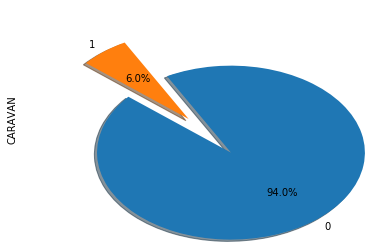

In [33]:
df.CARAVAN.value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=140,explode=(0.5, 0))

### Conclusion:

   - It's a dataset with 9822 observations.
   - The dataset is without null values and outliers
   - The dataset is imbalanced as Yes answer represent only 6%


In [34]:
yes = df[df.CARAVAN == 1].copy()

### Customer Sub Type

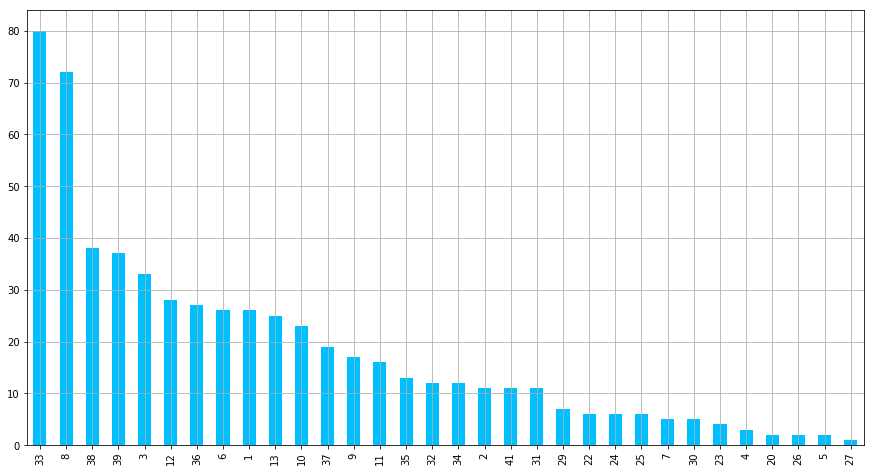

In [35]:
plt.figure(figsize=(15,8))
yes['CustomerSubtype'].value_counts().plot(kind='bar', align='center',color='deepskyblue', grid=True);

### Number of houses

### Age

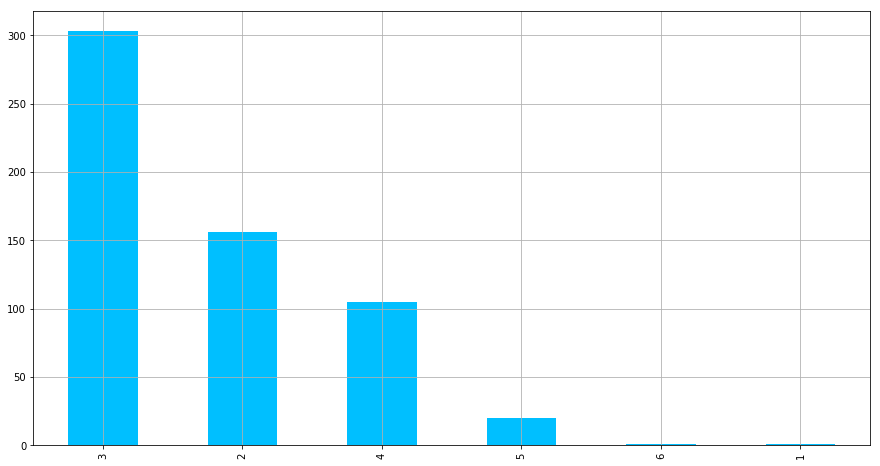

In [36]:
plt.figure(figsize=(15,8))
yes['AvgAge'].value_counts().plot(kind='bar', align='center',color='deepskyblue', grid=True);

### Customer main type 

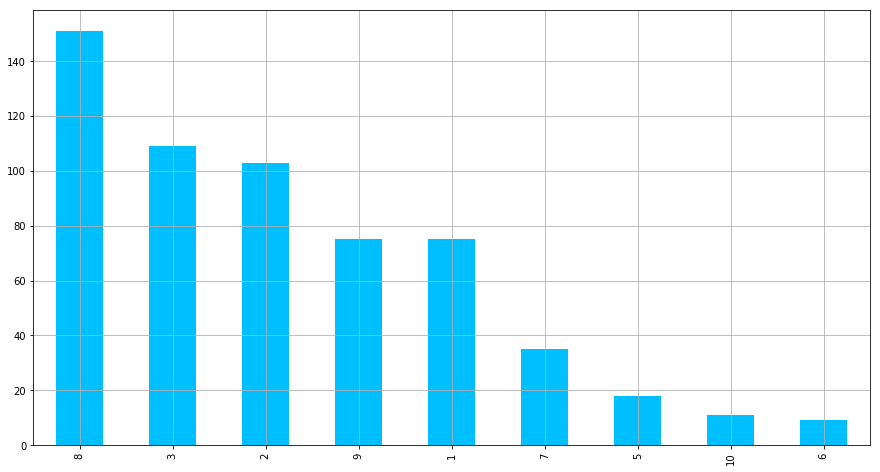

In [37]:
plt.figure(figsize=(15,8))
yes['CustomerMainType'].value_counts().plot(kind='bar', align='center',color='deepskyblue', grid=True);

**DIMENSIONALITY REDUCTION**

# Model Training 

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [39]:
train = df[df.ORIGIN == 'train'].copy()
test = df[df.ORIGIN == 'test'].copy()

In [40]:
Train_Y = train.CARAVAN
Train_X = train.drop(['CARAVAN','ORIGIN'], axis=1)


In [41]:
Test_Y = test.CARAVAN
Test_X = test.drop(['CARAVAN','ORIGIN'], axis=1)


## KNN

In [42]:
from sklearn import neighbors
print("Nearest Neighbors Dataframe Test score :")
clf = neighbors.KNeighborsClassifier(3,'distance')
clf.fit(X=Train_X,y=Train_Y)
clf.score(Test_X,Test_Y)

Nearest Neighbors Dataframe Test score :


0.92275

In [43]:
KNN_y_pred_class = clf.predict(Test_X)
class_names = np.unique(np.array(Test_Y))
confusion_matrix(Test_Y, KNN_y_pred_class)

array([[3667,   95],
       [ 214,   24]])

In [44]:
from sklearn.metrics import classification_report
print(classification_report(Test_Y, KNN_y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3762
           1       0.20      0.10      0.13       238

   micro avg       0.92      0.92      0.92      4000
   macro avg       0.57      0.54      0.55      4000
weighted avg       0.90      0.92      0.91      4000



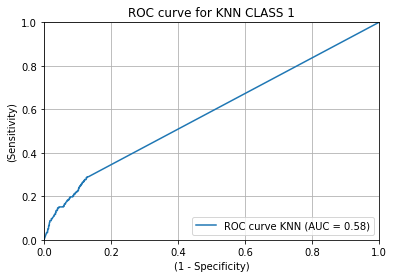

In [45]:
from sklearn.metrics import roc_curve, auc
knn_pred_prob = clf.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, knn_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve KNN (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### SVM


In [46]:
from sklearn.svm import SVC
clf_S = SVC(kernel='rbf',probability=True,random_state=0, gamma=.01, C=100000)
clf_S.fit(Train_X, Train_Y) 
print("SVM Dataframe Test score :")
print(clf_S.score(Test_X,Test_Y))

SVM Dataframe Test score :
0.8995


In [47]:
SVM_y_pred_class = clf_S.predict(Test_X)
class_names = np.unique(np.array(Test_Y))
confusion_matrix(Test_Y, SVM_y_pred_class)

array([[3570,  192],
       [ 210,   28]])

In [48]:
from sklearn.metrics import classification_report
report = classification_report(Test_Y,SVM_y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3762
           1       0.13      0.12      0.12       238

   micro avg       0.90      0.90      0.90      4000
   macro avg       0.54      0.53      0.53      4000
weighted avg       0.90      0.90      0.90      4000



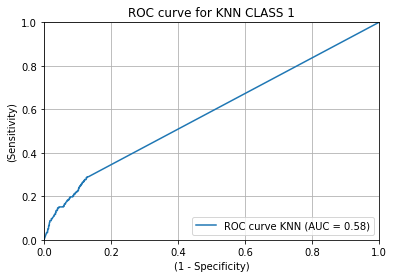

In [49]:
from sklearn.metrics import roc_curve, auc
svm_pred_prob = clf.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, svm_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve KNN (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

**Neural Network**

In [50]:
from sklearn.neural_network import *

In [51]:
MLPClassifier(activation='relu', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=True,
       warm_start=False)
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))

clf_MLP.fit(Train_X, Train_Y)
y_pred_MLP = clf_MLP.predict(Test_X)
confusion_matrix(Test_Y, y_pred_MLP)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[3697,   65],
       [ 223,   15]])

In [52]:
print("Neural network Dataframe Test score :")
print(clf_MLP.score(Test_X,Test_Y))

Neural network Dataframe Test score :
0.928


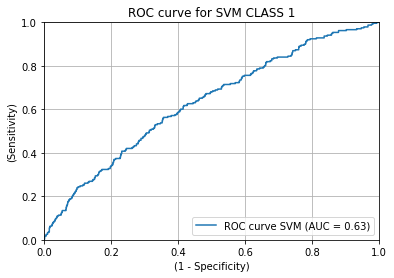

In [53]:
from sklearn.metrics import roc_curve, auc
MLP_pred_prob = clf_S.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y,MLP_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve SVM (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for SVM CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

**Naives Bayesian Classifier**

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(Train_X, Train_Y)
y_pred_navies = gnb.predict(Test_X)
print(gnb.score(Test_X,Test_Y))
class_names=np.unique(np.array(Test_Y))
confusion_matrix(Test_Y,y_pred_navies)

0.187


array([[ 523, 3239],
       [  13,  225]])

In [55]:
print(classification_report(Test_Y, y_pred_navies))

              precision    recall  f1-score   support

           0       0.98      0.14      0.24      3762
           1       0.06      0.95      0.12       238

   micro avg       0.19      0.19      0.19      4000
   macro avg       0.52      0.54      0.18      4000
weighted avg       0.92      0.19      0.24      4000



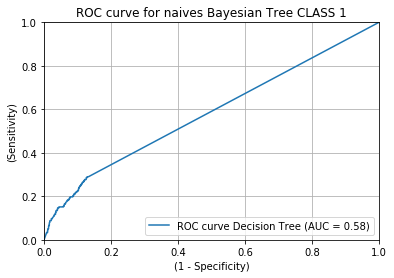

In [57]:
from sklearn.metrics import roc_curve, auc
gnb_pred_prob = clf.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, gnb_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Decision Tree (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for naives Bayesian Tree CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### Decision Tree


In [58]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(Train_X, Train_Y) 
print(clf_tree.score(Test_X,Test_Y))

0.891


In [59]:
tree_y_pred_class = clf_tree.predict(Test_X)
class_names = np.unique(np.array(Test_Y))
confusion_matrix(Test_Y, tree_y_pred_class)

array([[3536,  226],
       [ 210,   28]])

In [60]:
print(classification_report(Test_Y, KNN_y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3762
           1       0.20      0.10      0.13       238

   micro avg       0.92      0.92      0.92      4000
   macro avg       0.57      0.54      0.55      4000
weighted avg       0.90      0.92      0.91      4000



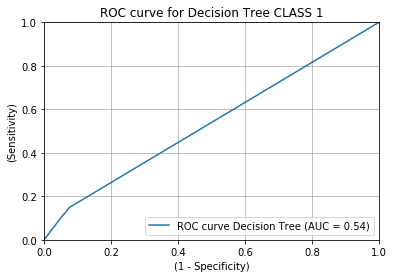

In [61]:
from sklearn.metrics import roc_curve, auc
tree_pred_prob = clf_tree.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, tree_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Decision Tree (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Decision Tree CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

**ACCURACY OF Models**

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
print('       Accuracy of Models       ')
print('--------------------------------')
print('Decision Tree           '+"{:.2f}".format(accuracy_score(Test_Y, tree_y_pred_class)*100)+'%')
print('Naive Bayes             '+"{:.2f}".format(accuracy_score(Test_Y, y_pred_navies)*100)+'%')
print('Neural Network          '+"{:.2f}".format(accuracy_score(Test_Y, y_pred_MLP)*100)+'%')
print('K-Nearest Neighbours     '+"{:.2f}".format(accuracy_score(Test_Y, KNN_y_pred_class)*100)+'%')

print('Support Vector Machine  '+"{:.2f}".format(accuracy_score(Test_Y, SVM_y_pred_class)*100)+'%')

       Accuracy of Models       
--------------------------------
Decision Tree           89.10%
Naive Bayes             18.70%
Neural Network          92.80%
K-Nearest Neighbours     92.27%
Support Vector Machine  89.95%


## Comparing the models 

In [64]:
fpr6, tpr6, thresholds6 = roc_curve(Test_Y, gnb_pred_prob)
roc_auc6 = auc(fpr6, tpr6)

fpr5, tpr5, thresholds5 = roc_curve(Test_Y, knn_pred_prob)
roc_auc5 = auc(fpr5, tpr5)



fpr3, tpr3, thresholds3 = roc_curve(Test_Y, y_pred_MLP)
roc_auc3 = auc(fpr3, tpr3)

fpr2, tpr2, thresholds2 = roc_curve(Test_Y, tree_pred_prob)
roc_auc2 = auc(fpr2, tpr2)

fpr1, tpr1, thresholds1 = roc_curve(Test_Y,svm_pred_prob)
roc_auc1 = auc(fpr1, tpr1)
lw = 2
plt.plot(fpr6, tpr6,color='orange',label='ROC curve navies (AUC = %0.2f)' % roc_auc6)
plt.plot(fpr5, tpr5,color='green',label='ROC curve KNN (AUC = %0.2f)' % roc_auc5)

plt.plot(fpr3, tpr3,color='gold',label='ROC curve neural (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr2, tpr2,color='black',label='ROC curve decision tree (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr1, tpr1,color='navy',label='ROC curve SVM (AUC = %0.2f)' % roc_auc1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve ')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

NameError: name 'ppn_pred_prob' is not defined

The curves for each model are thus indicative of relative predictive power of each model. For instance, BRF model has higher probability of accurate prediction of correct class member, and gaining high level of accuracy prediction probability as compared to RP and SVM models.  xgboost is close .


<br>